# NT532 - CÔNG NGHỆ INTERNET OF THINGS HIỆN ĐẠI

**Hướng dẫn**:
*   Khởi động runtime: chọn **Connect** tại góc trên bên phải.
*   Hoàn thành tất cả các mục có comment `YOUR CODE HERE` và các câu hỏi được thể hiện.
*   Chạy toàn bộ các block code để kiểm tra: Ở thanh menu, chọn Runtime$\rightarrow$Run all.

---

# PHẦN 1: CÀI ĐẶT MÔ HÌNH LOGISTIC REGRESSION VỚI KERAS

## 1. Import các thư viện Keras

Đầu tiên, chúng ta sẽ import các thư viện, module, hàm của `Keras`:
- `Input`: để nhận dữ liệu đầu vào cho mô hình.
- `Dense`: hay còn gọi là lớp Fully Connected (Lớp kết nối đầy đủ), một thành phần quan trọng của các mô hình dựa trên mạng Neural Network.
- `Model`: đây là lớp đối tượng mô hình được sử dụng để đóng gói lớp đầu vào, đầu ra, sau đó huấn luyện với phương thức `fit` và dự đoán kết quả với `predict`.
- `load_model`: hàm sử dụng để load mô hình lên từ file.

In [ ]:
from keras.layers import Input, Dense
from keras import Model
import tensorflow as tf
from keras.models import load_model
import seaborn as sns

## 2. Tạo dữ liệu mẫu (toy example)
Bước tiếp theo, ta sẽ tiến hành tạo dữ liệu mẫu để huấn luyện và kiểm thử.

Giả sử rằng dữ liệu được tạo ra xoay quanh 2 điểm tâm cho trước, cụ thể:
- [1, 6]
- [6, 1]

Hai điểm này có đặc điểm đủ cách xa nhau để các điểm khác được sinh ra xung quanh 2 điểm này không giao thoa với nhau. Đảm bảo được độ chính xác cũng như ổn định của mô hình.

[]

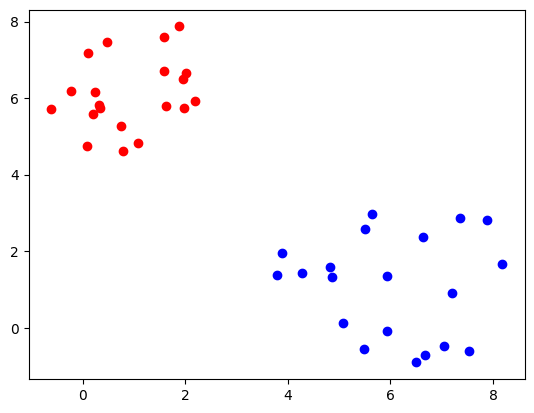

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Số lượng điểm dữ liệu tại mỗi cụm
n_sample = 20

# Tạo bộ dữ liệu gồm 2 tập đỏ và xanh:
# Tạo 2 tập xanh và đỏ được tạo xoay quanh điểm (1,6) và (6,1) một cách ngẫu nhiên
# Kết hợp 2 tập này trở thành `x_train` và `y_train` (sử dụng numpy.concatenate)
#tọa độ điểm đỏ là (1,6) va điểm xanh là (1,6)
red_points = np.random.randn(n_sample, 2) + np.array([1, 6])
blue_points = np.random.randn(n_sample, 2) + np.array([6, 1])

x_train = np.concatenate([red_points, blue_points])
y_train = np.concatenate([np.zeros(n_sample), np.ones(n_sample)])

# Tương tụ như ở trên, tạo tập dữ liệu validation:
red_points_test = np.random.randn(n_sample, 2) + np.array([1, 6])
blue_points_test = np.random.randn(n_sample, 2) + np.array([6, 1])

x_test = np.concatenate([red_points_test, blue_points_test])
y_test = np.concatenate([np.zeros(n_sample), np.ones(n_sample)])

# Trực quan hóa dữ liệu bằng biểu đồ được thể hiện dưới dạng các chấm tròn đỏ, xanh
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')
plt.plot()


## 3. Cài đặt mô hình Logistic Regression
Logistic Regression: mô hình hồi quy luận lý là một mô hình cơ bản được sinh ra để giải quyết bài toán phân lớp nhị phân.

Tại đây, chúng ta sẽ tiến hành định nghĩa mô hình Logistic Regression dựa trên các đối tượng được cung cấp bởi Keras. Các nội dung này sinh viên cần tìm hiểu ý nghĩa, cách thức sử dụng để hiểu được nội dung được định nghĩa.

<p align="center">
  <img src="https://mlcorner.com/wp-content/uploads/2020/10/Screenshot-2020-10-09-at-15.26.55.png" />
</p>

In [ ]:
# Tìm hiểu đối với bài toán Logistic Regression, hệ số `imput_dim` bằng bao nhiêu? Giải thích.
#Trả lời: trong bài toán logistics Regression hệ số input_dim = 2 do input_dim sẽ tương ứng với số hệ số đầu vào của bài toán, trong bài toán này là 2 biến tọa độ x,y
# YOUR CODE HERE


input_dim = 2

# Tương tự như cách cài đặt Linear Regression,tuy nhiên có sự khác kh au khi cài đặt tại tham số activation
# Tìm ra điểm khác nhau và giải thích về sự khác nhau này từ việc tìm hiểu về Logistic Regression

input = Input(shape = input_dim)




output = output = Dense(1, activation='sigmoid')(input)


# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("The architecture of Linear Regression model: ")


LogisticRegression = Model(input, output)

# Để hiển thị kiến trúc của mô hình ta gọi phương thức `summary`
print("The architecture of Logistic Regression model: ")
LogisticRegression.summary()

The architecture of Linear Regression model: 
The architecture of Logistic Regression model: 
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x_train, y_train

(array([[ 2.62434536,  5.38824359],
        [ 0.47182825,  4.92703138],
        [ 1.86540763,  3.6984613 ],
        [ 2.74481176,  5.2387931 ],
        [ 1.3190391 ,  5.75062962],
        [ 2.46210794,  3.93985929],
        [ 0.6775828 ,  5.61594565],
        [ 2.13376944,  4.90010873],
        [ 0.82757179,  5.12214158],
        [ 1.04221375,  6.58281521],
        [-0.10061918,  7.14472371],
        [ 1.90159072,  6.50249434],
        [ 1.90085595,  5.31627214],
        [ 0.87710977,  5.06423057],
        [ 0.73211192,  6.53035547],
        [ 0.30833925,  5.60324647],
        [ 0.3128273 ,  5.15479436],
        [ 0.32875387,  5.9873354 ],
        [-0.11731035,  6.2344157 ],
        [ 2.65980218,  6.74204416]]),
 array([[ 5.80816445,  0.11237104],
        [ 5.25284171,  2.6924546 ],
        [ 6.05080775,  0.36300435],
        [ 6.19091548,  3.10025514],
        [ 6.12015895,  1.61720311],
        [ 6.30017032,  0.64775015],
        [ 4.8574818 ,  0.65065728],
        [ 5.79110577,  1.5

In [ ]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1) # Stochastic Gradient Descent

# Loss function được sử dụng trong Linear Regression là gì?
# YOUR CODE HERE
loss = "binary_crossentropy"

LogisticRegression.compile(optimizer=opt, loss=loss)

# Huấn luyện với 50 epochs
hist = LogisticRegression.fit(x_train, y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 15ms/step - loss: 5.4387
Epoch 2/50
2/2 [==============================] - 0s 12ms/step - loss: 2.9944
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 1.1198
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 0.4196
Epoch 5/50
2/2 [==============================] - 0s 8ms/step - loss: 0.2219
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1536
Epoch 7/50
2/2 [==============================] - 0s 8ms/step - loss: 0.1211
Epoch 8/50
2/2 [==============================] - 0s 9ms/step - loss: 0.1013
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0875
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 0.0771
Epoch 11/50
2/2 [==============================] - 0s 8ms/step - loss: 0.0695
Epoch 12/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0629
Epoch 13/50
2/2 [==============================] - 0s 8ms/step - loss:

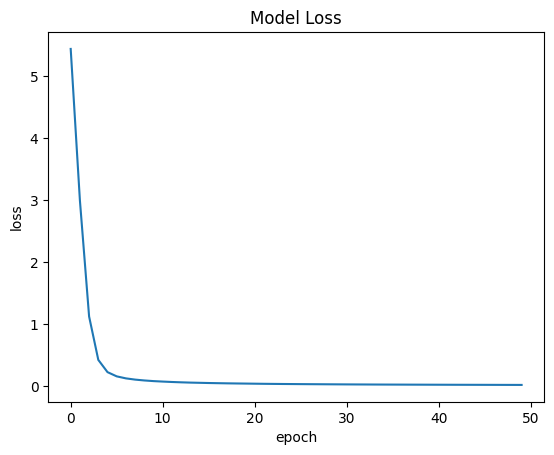

In [ ]:
# Hiển thị loss theo số epoch
plt.plot(hist.history['loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

## 4. Lưu trữ và tái sử dụng model
Sau khi đã huấn luyện, ta lưu mô hình để có thể tái sử dụng trong tương lai. 

Sử dụng phương phương thức `save` để lưu trữ mô hình và `load_model` để tải lại mô hình và tái sử dụng. 

Điều này có thể áp dụng để sử dụng mô hình trong tương lai mà **KHÔNG CẦN PHẢI HUẤN LUYỆN LẠI**.

In [ ]:
LogisticRegression.save('logistic_regression_model.h5')

pretrain_LogisticRegression = load_model('logistic_regression_model.h5')

In [ ]:
pretrain_LogisticRegression

AttributeError: ignored

## 5. Trực quan hóa mô hình và dự đoán với dữ liệu test

In [ ]:
pretrain_LogisticRegression.get_weights()

[array([[-1.0134104],
        [ 1.1500262]], dtype=float32),
 array([0.04552304], dtype=float32)]

In [ ]:
result = pretrain_LogisticRegression.get_weights()
print('Tham số tối ưu: ')

# Tương tự như Logistic Regression, tiến hành tìm hiểu và in ra các hệ số học tập được thông qua quá trình huấn luyện
# YOUR CODE HERE
theta2= result[0][0]
theta1 = result[0][1]
bias= result[1]


print('Trong đó: ')
print('   - bias (hệ số tự do) : ', bias)
print('   - theta1 (hệ số cho dữ liệu x1): ', theta1)
print('   - theta2 (hệ số cho dữ liệu x2): ', theta2)

Tham số tối ưu: 
Trong đó: 
   - bias (hệ số tự do) :  [0.01247832]
   - theta1 (hệ số cho dữ liệu x1):  [-0.93938005]
   - theta2 (hệ số cho dữ liệu x2):  [1.0750096]


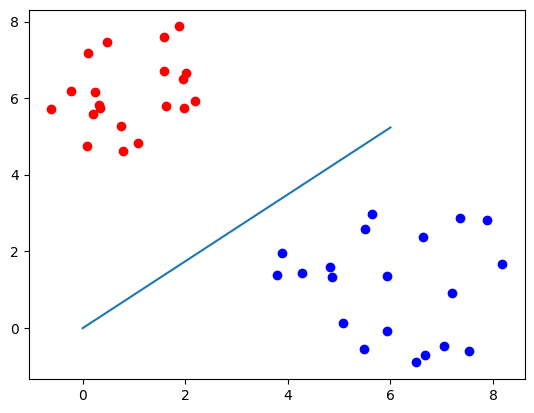

In [ ]:
# Trực quan hóa dữ liệu và mô hình sau khi huấn luyện
plt.plot(red_points[:,0], red_points[:,1], 'ro')
plt.plot(blue_points[:,0], blue_points[:,1], 'bo')

# Trực quan hóa đường thẳng phân lớp 2 tập đỏ, xanh từ các hệ số ở trên:
# Khoảng giá trị nhỏ nhất và lớn nhất mà x1 có thể nhận được từ 0-6
x1=[0, 6]

# Tính giá trị x2 dựa trên các tham số theta1, theta2, bias
# Tìm hiểu các tham số này mang ý nghĩa gì và thể hiện như thế nào?
# Từ đó tính toán giá trị x2
# YOUR CODE HERE
x2 =(-bias - theta1 * x1) / theta2

plt.plot(x1, x2)
plt.show()

Từ kết quả đường thẳng thu được ở trên, bạn có nhận xét như thế nào về đường thẳng này đối với 2 tập dữ liệu xanh và đỏ.

Nhận xét của bạn?

Tiếp theo đây, chúng ta sẽ kiểm tra sự dự đoán của mô hình Logistic Regression đã huấn luyện ở trên.

In [ ]:
y_train.shape

(20, 2)

In [ ]:
x_test

array([[ 0.77767186,  5.79924193],
       [ 1.18656139,  6.41005165],
       [ 1.19829972,  6.11900865],
       [ 0.32933771,  6.37756379],
       [ 1.12182127,  7.12948391],
       [ 2.19891788,  6.18515642],
       [ 0.62471505,  5.36126959],
       [ 1.42349435,  6.07734007],
       [ 0.65614632,  6.04359686],
       [ 0.37999916,  6.69803203],
       [ 0.55287144,  7.2245077 ],
       [ 1.40349164,  6.59357852],
       [-0.09491185,  6.16938243],
       [ 1.74055645,  5.0462994 ],
       [ 0.73378149,  6.03261455],
       [-0.37311732,  6.31515939],
       [ 1.84616065,  5.14048406],
       [ 1.35054598,  4.68771659],
       [ 0.96130449,  4.38422765],
       [ 2.12141771,  6.40890054]])

In [ ]:
y_pred = pretrain_LogisticRegression.predict(x_test)[:,0]
y_pred

1/1 [==============================] - 0s 20ms/step


array([0.99733984, 0.9980043 , 0.9971799 , 0.99913   , 0.9991819 ,
       0.9928268 , 0.99623424, 0.99628645, 0.9982227 , 0.99936634,
       0.99958783, 0.9979868 , 0.9992808 , 0.98345524, 0.9980531 ,
       0.9995411 , 0.9834763 , 0.983174  , 0.9839095 , 0.9948626 ],
      dtype=float32)

In [ ]:
y_pred.shape()

TypeError: ignored

In [ ]:
# Sai số trung bình khi thử nghiệm trên tập test:
y_pred = pretrain_LogisticRegression.predict(x_test)[:,0]

y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0
y_test[y_test >= 0.5] = 1
y_test[y_test < 0.5] = 0
print('Giá trị nhãn dự đoán trên tập test: ')
print(y_pred)
print('Giá trị nhãn phát sinh (tập test): ')
print(y_test)

2/2 [==============================] - 0s 7ms/step
Giá trị nhãn dự đoán trên tập test: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Giá trị nhãn phát sinh (tập test): 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Từ các nhận xét ở trên, thêm vào đó là các giá trị dự đoán `y_pred` so với dữ liệu `y_test` đã phát sinh tại phần 1. Bạn hãy có nhận xét về kết quả thu được và những nội dung tìm hiểu.

> Indented block



In [ ]:
options = ['Hả? Hoi hoi! Ai làm gì làm, tui không có biết :((((', 'y_pred gần như chính xác so với y_test', 'y_pred là không khớp so với y_test', 'y_pred đôi khi giống nhau so với y_test nhưng đôi khi lại gần giống nhau so với y_test tùy thuộc vào nhiều yếu tố']

# Hãy chọn your_choice bằng 0, 1, 2, 3 tương ứng với các lựa chọn ở trên
# YOUR CODE HERE
your_choice = 1

print("Kết quả không thể nào khác, đó chính là: ", options[your_choice])

Kết quả không thể nào khác, đó chính là:  y_pred gần như chính xác so với y_test


Để tính tổng độ chính xác (Accuracy), ta đếm tổng số mẫu mà giá trị dự đoán khớp với giá trị phát sinh, sau đó chia cho tổng số mẫu:

In [ ]:
def accuracy(y_pred, y_test):
    accuracy = None
    # Cài đặt biến `acc` chứa độ chính xác theo %
    # với công thức tính bằng tổng số mẫu dự đoán đúng 
    # (`y_pred` và `y_test` khớp nhau) chia cho tổng số mẫu
    # của tập test. 
    # Lưu ý: giá trị nhỏ nhất là 0%, lớn nhất là 100%
    # YOUR CODE HERE
    accuracy = np.mean(y_pred == y_test) * 100

    return accuracy


In [ ]:
accuracy


<function __main__.accuracy(y_pred, y_test)>

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.], dtype=float32)

In [ ]:
print("Độ chính xác trên tập test: ", accuracy(y_pred, y_test), "(%)")

Độ chính xác trên tập test:  100.0 (%)


# PHẦN 2: LOGISTIC REGRESSION SỬ DỤNG THƯ VIỆN SCIKIT-LEARN VỚI BÀI TOÁN CỤ THỂ

Tại phần thực hành này, sinh viên sẽ tìm hiểu về dataset và cách sử dụng dataset được cung cấp tại https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset





In [ ]:
# Mount dữ liệu từ drive của bạn và google colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Upload file dataset đã download tại đường dẫn trên vào google colab
from google.colab import files
data = files.upload()

Saving cardio_train.csv to cardio_train (1).csv


In [ ]:
import pandas as pd

chd_data = pd.read_csv('/content/cardio_train.csv', sep=';')

In [ ]:
chd_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
chd_data.shape

(70000, 13)

In [ ]:
chd_data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [ ]:
chd_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [ ]:
# Xóa các cột không cần đến
del chd_data['id']
chd_data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Cần phân loại ra tập dữ liệu, 1 tập dữ liệu `X` là dữ liệu dùng để huấn luyện và `Y` là dữ liệu `ground truth` của tập dữ liệu `X`. Có nghĩa là với mỗi hàng hàng loạt các giá trị của `X` thì sẽ đạt được kết quả trong `Y`. 

Từ nội dung này ta có thể huấn luyện mô hình trên `X` và sử dụng kết quả dự đoán được từ `X` và so sánh với `Y` để tính toán được chất lượng phân loại.

In [ ]:
# X được lọc ra từ `chd_data` gồm tất cả các trường dữ liệu từ đầu đến trường `active`
# Y chỉ bao gồm trường `cardio`
# 2 tập này đều ở dạng numpy
# YOUR CODE HERE
X=chd_data.drop(['cardio'],axis=1)
Y=chd_data['cardio']

In [ ]:
# Sử dụng thư việc scikit-learn (sklearn) để preprocessing dữ liệu
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
# Chuyển vị tập Y để dễ dàng trong quá trình nhân ma trận
Y = lb.fit_transform(Y)

In [ ]:
# Tiếp tục sử dụng các phương thức của thư viện sklearn
# để chọn ra tập train, tập test từ X và Y
# Sử dụng `train_test_split` từ `sklearn.model_selection`
from sklearn.model_selection import train_test_split

# YOUR CODE HERE
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)


In [ ]:
# Để `công bằng` hơn đối với các trường dữ liệu, ta tiến hành scale các trường dữ liệu với `StandardScaler`
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()
x_train_scaler = Scaler.fit_transform(x_train)
x_test_scaler = Scaler.transform(x_test)

In [ ]:
# Hàm dùng để trực quan các dữ liệu bằng biểu đồ
def feature_visualizer(features, feature_names):
  num_ft = features.shape[1]
  fig, ax = plt.subplots(num_ft, 1, figsize=(20, 30))
  for i in range(num_ft):
    sns.distplot(features[:, i], ax=ax[i], axlabel=feature_names[i])
  plt.show()

<ipython-input-39-6448408a4e61>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[:, i], ax=ax[i], axlabel=feature_names[i])
<ipython-input-39-6448408a4e61>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(features[:, i], ax=ax[i], axlabel=feature_names[i])
<ipython-input-39-6448408a4e61

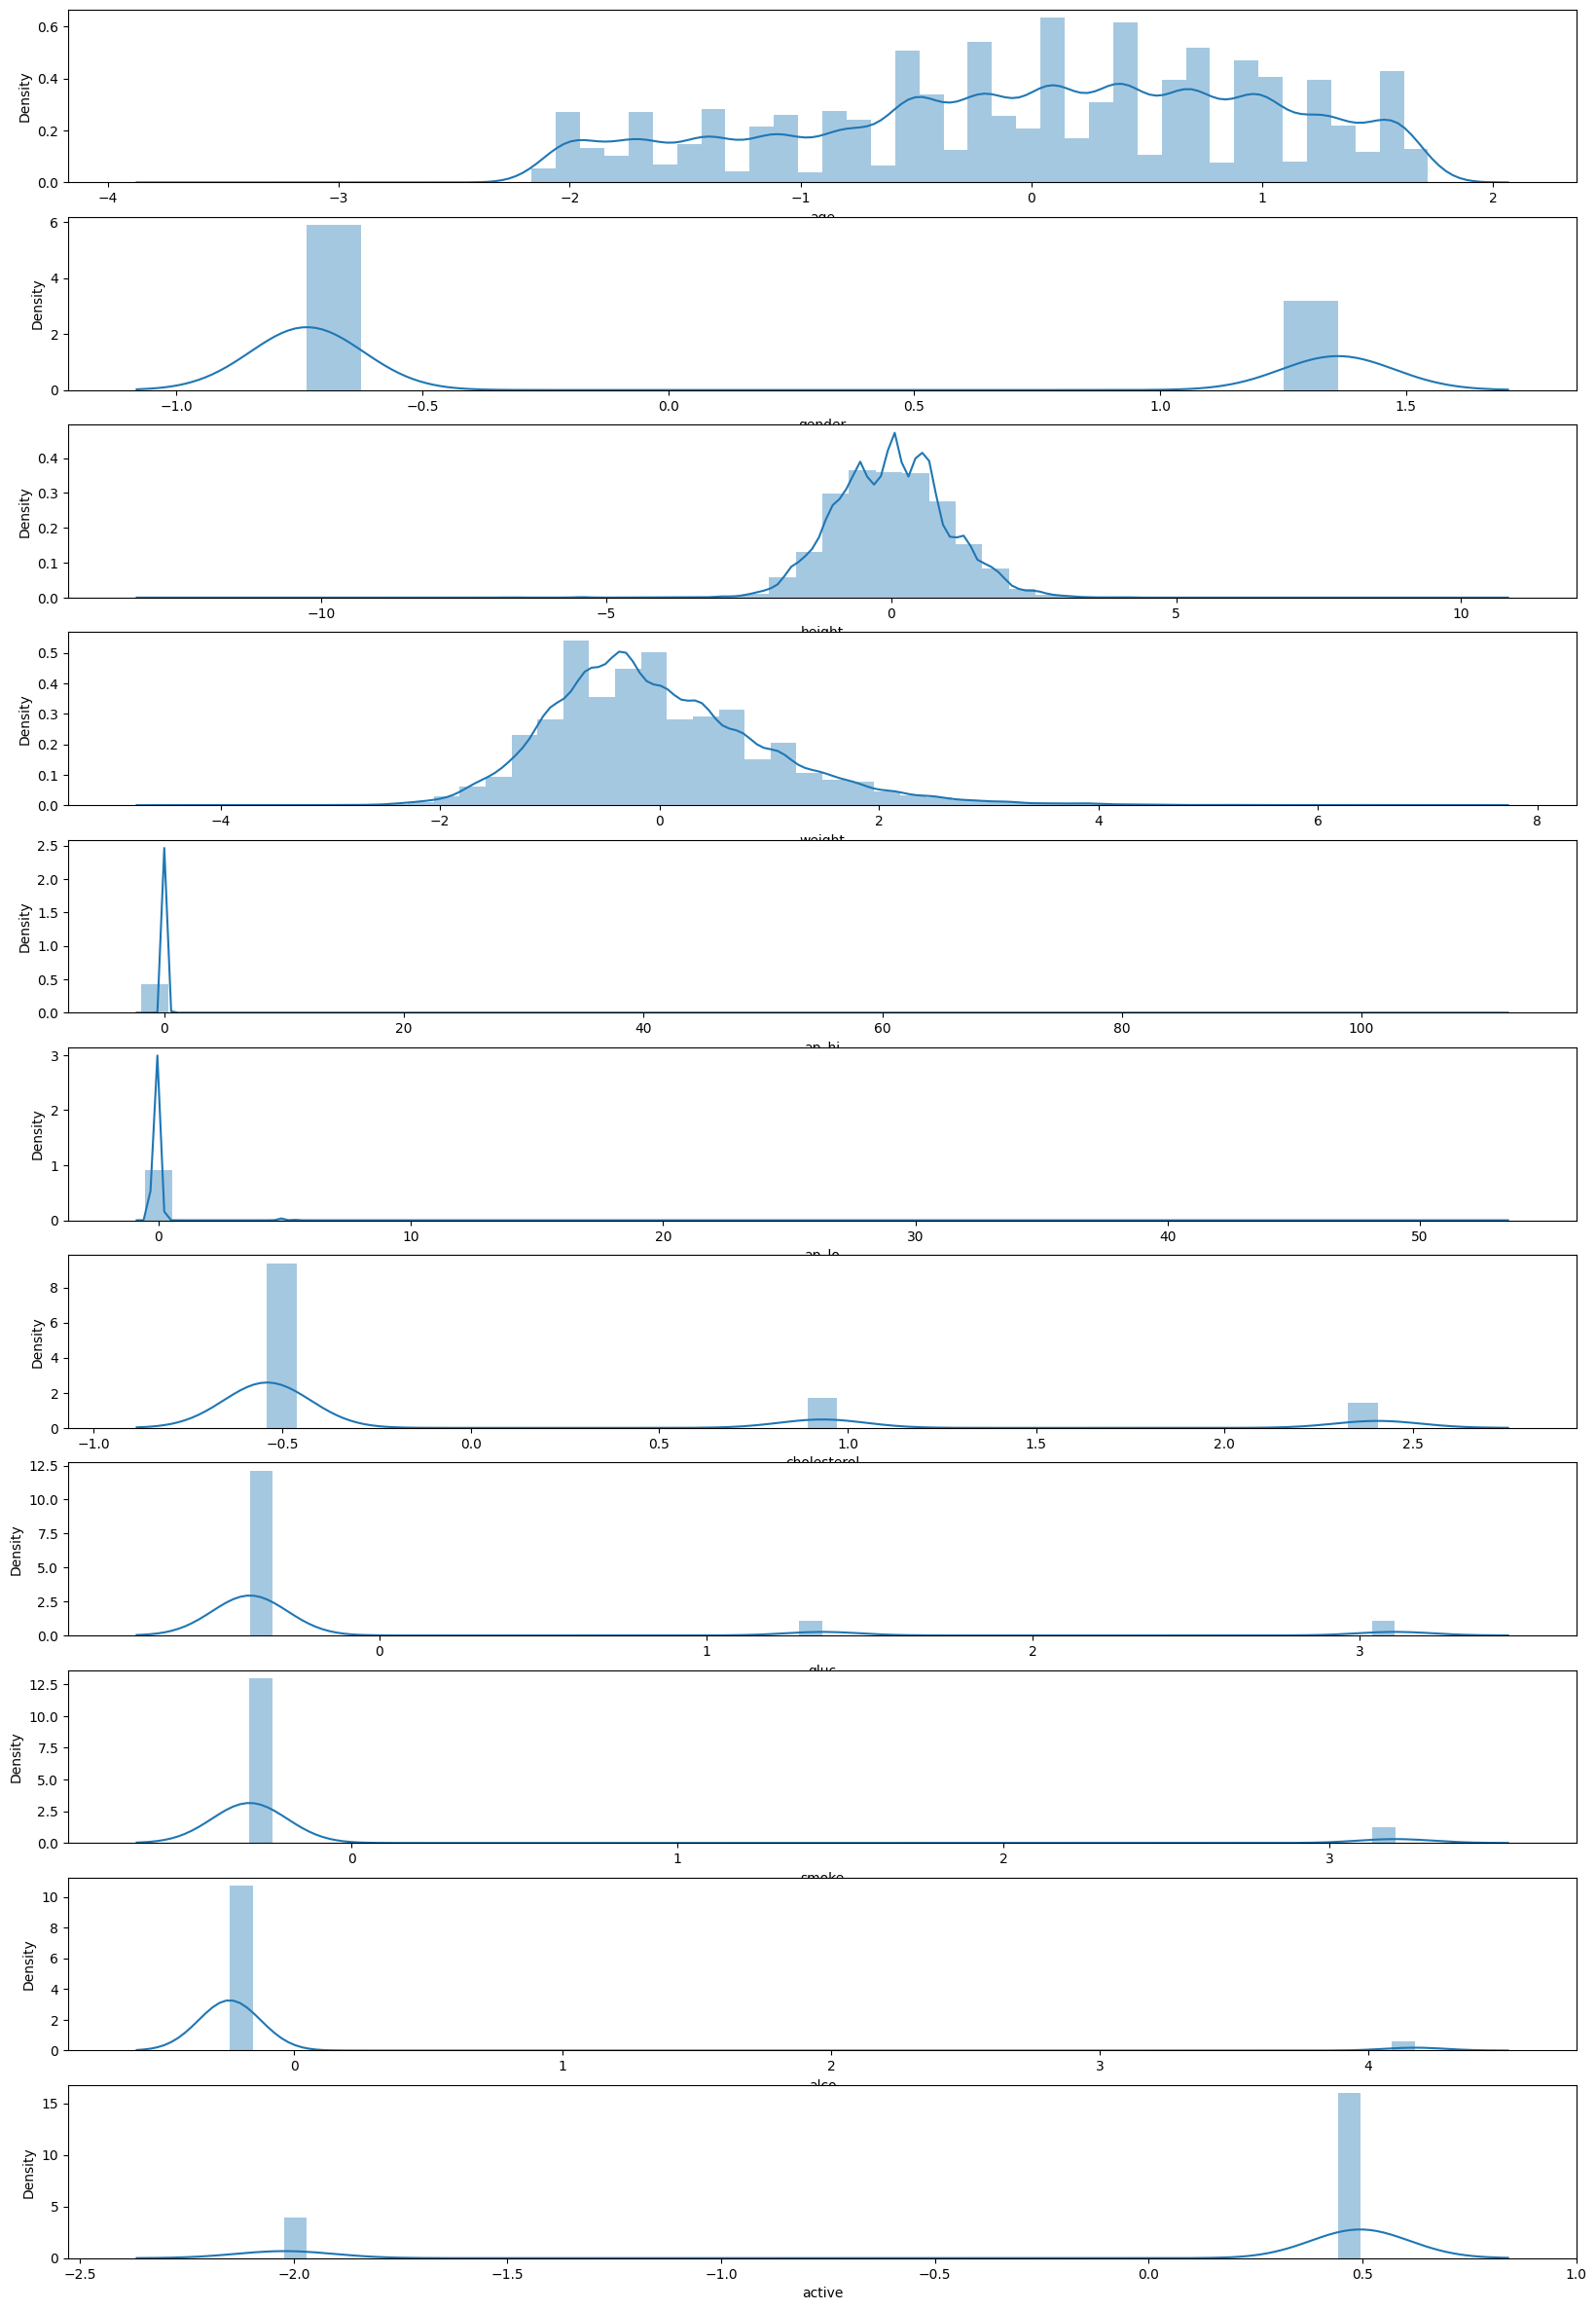

In [ ]:
ft_names = chd_data.columns
feature_visualizer(x_train_scaler, ft_names)

In [ ]:
# Thực hiện sử dụng mô hình Logistic Regression được cung cấp bởi sklearn
# Và tiến hành huấn luyện mô hình dựa trên các giá trị đã chuẩn bị ở trên
from sklearn.linear_model import LogisticRegression
# YOUR CODE HERE

lr = LogisticRegression()
lr.fit(x_train_scaler,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
# Sử dụng phương thức `predict` để dự đoán các giá trị `y_predict`
# YOUR CODE HERE
y_predict = lr.predict(x_test_scaler)


Cuối cùng, ta thực hiện đánh giá mô hình Logistic Regression thông qua các score `accuracy`, `precision`, `recall`, `f1`. Sinh viên cần tìm hiểu các thông số này được tính toán như thế nào? Các thông số này có ý nghĩa ra sao?

In [ ]:
# Tiến hành import và sử dụng in ra các score này để đánh giá mô hình
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(accuracy_score(y_test, y_predict))
print(precision_score(y_test, y_predict))
print(recall_score(y_test, y_predict))
print(f1_score(y_test, y_predict))

0.7211428571428572
0.7431105479885968
0.6727846286205907
0.7062010836845274


In [ ]:
# Ngoài ra, ta có thể thực hiện kiểm tra các thông số này qua `classification_report`
# Tìm cách import và sử dụng phương thức này
# YOUR CODE HERE
from sklearn.metrics import classification_report

report = classification_report(y_test, y_predict)

print(report)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73     10539
           1       0.74      0.67      0.71     10461

    accuracy                           0.72     21000
   macro avg       0.72      0.72      0.72     21000
weighted avg       0.72      0.72      0.72     21000



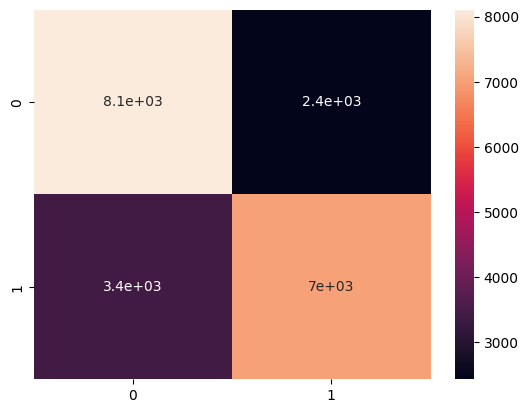

In [ ]:
# Cuối cùng, ta có thể xem `confusion_matrix` dưới dạng `heatmap`
# Tìm cách import và sử dụng phương thức này
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predict)


plt.figure()
sns.heatmap(cm, annot=True)
plt.show()

HẾT RỒI, CHÚC MỪNG BẠN ĐÃ HOÀN THÀNH.